Find and plot the temperature gradient and the shock direction.
NB: problems in plotting due to the scale of ax.quiver.
NB: you produce and save plot not txt or other data

In [2]:
import sys
sys.path.append('/Users/paolamartire/shocks')

import numpy as np
import matplotlib.pyplot as plt

from src.grid_maker import make_grid
from Utilities.operators import calc_grad

In [3]:
gamma = 5/3
mach_min = 1.3
num = 45

In [4]:
gridded_indexes, gridded_den, gridded_T, gridded_P, gridded_Vx, gridded_Vy, gridded_Vz, gridded_V, gridded_Rcell, x_radii, y_radii, z_radii = make_grid(num)

all T=0, bro. CHANGE!
Tree built!


In [5]:
deltax = (x_radii[-1]-x_radii[0])/num

In [6]:
# Cross section 
idx_slice = 22
z_chosen = np.round(z_radii[idx_slice],3)
flat_T = gridded_T[:,:,idx_slice]
T_plot = np.log10(flat_T)
T_plot = np.nan_to_num(T_plot, neginf = 0)

In [7]:
# gradient of T
gradx_delta = []
grady_delta = []
gradz_delta = []
X_cell = [] # len = (len(x_array)-2)**2 i.e. every combination of x and y (without the edges)
Y_cell = []
for i in range(1, len(x_radii)-1):
    for j in range(1,len(y_radii)-1):
        for k in range(idx_slice,idx_slice+1):
            idx = [i,j,k]
            grad =  calc_grad(x_radii, y_radii, z_radii, gridded_T, idx, kind_info = 'idx')
            gradx_delta.append(-grad[0])
            grady_delta.append(-grad[1])
            X_cell.append(x_radii[i])
            Y_cell.append(y_radii[j])

X_cell = np.array(X_cell)
Y_cell = np.array(Y_cell)
gradx_delta = np.array(gradx_delta)
grady_delta = np.array(grady_delta)

Text(0.5, 1.0, 'zoom')

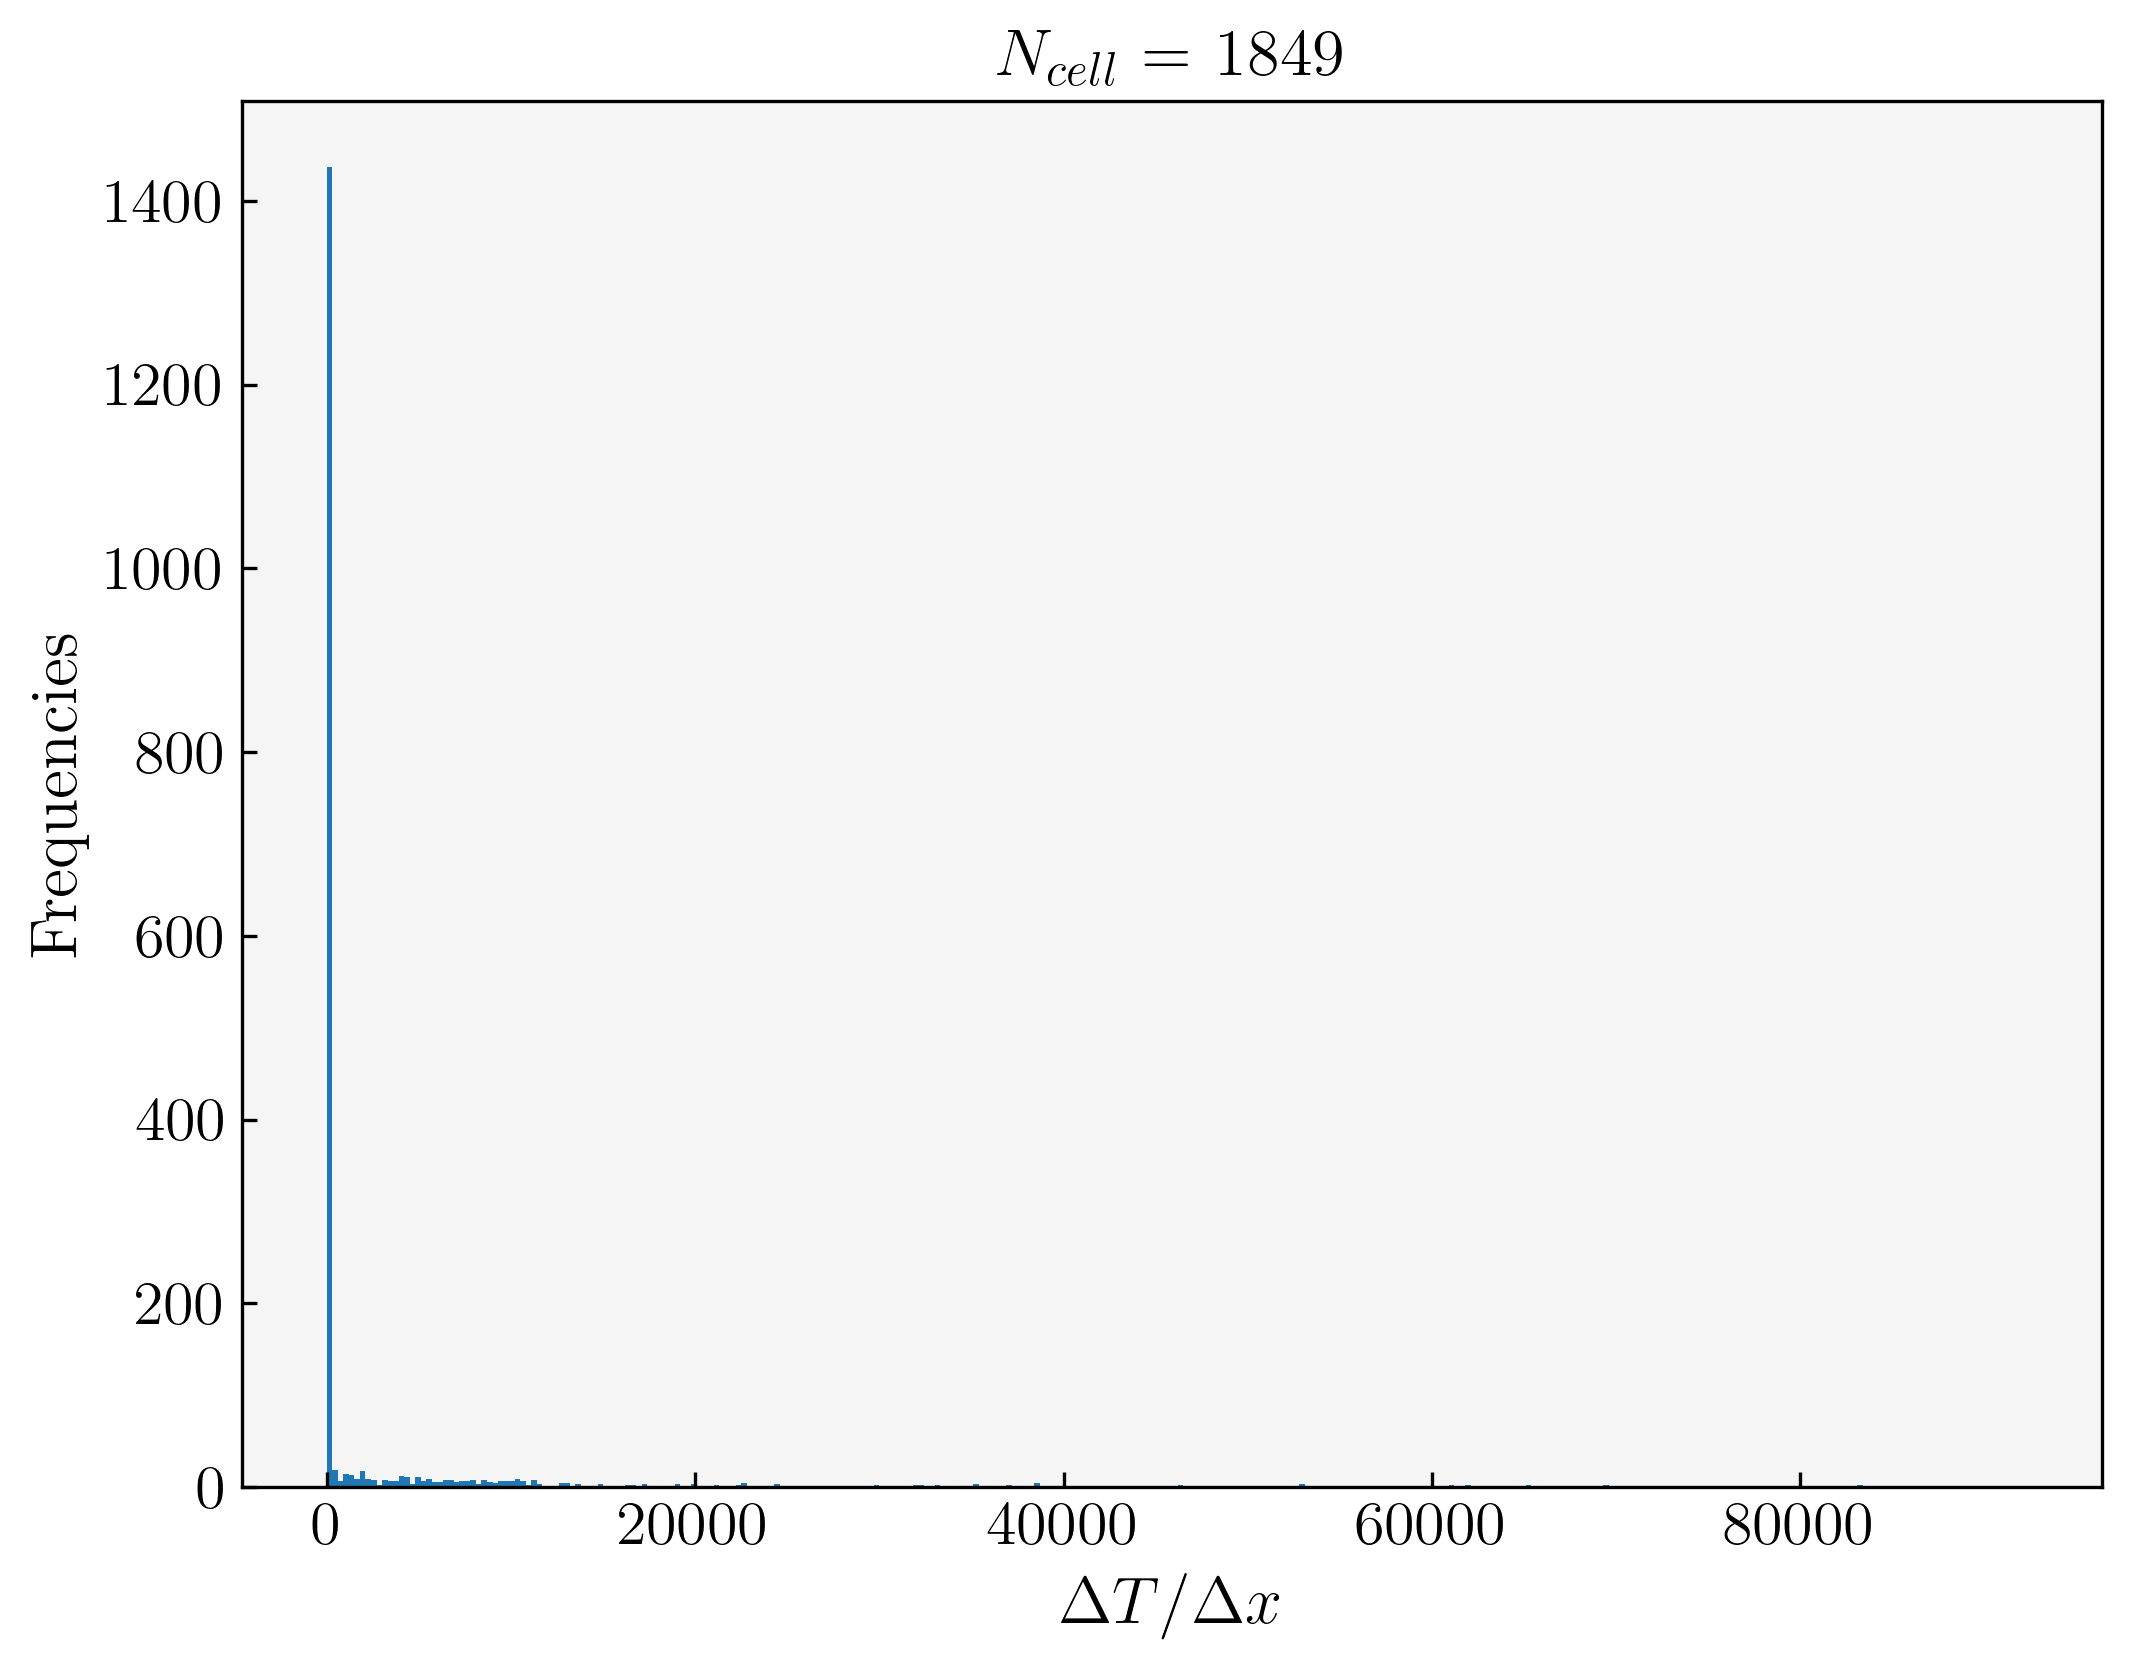

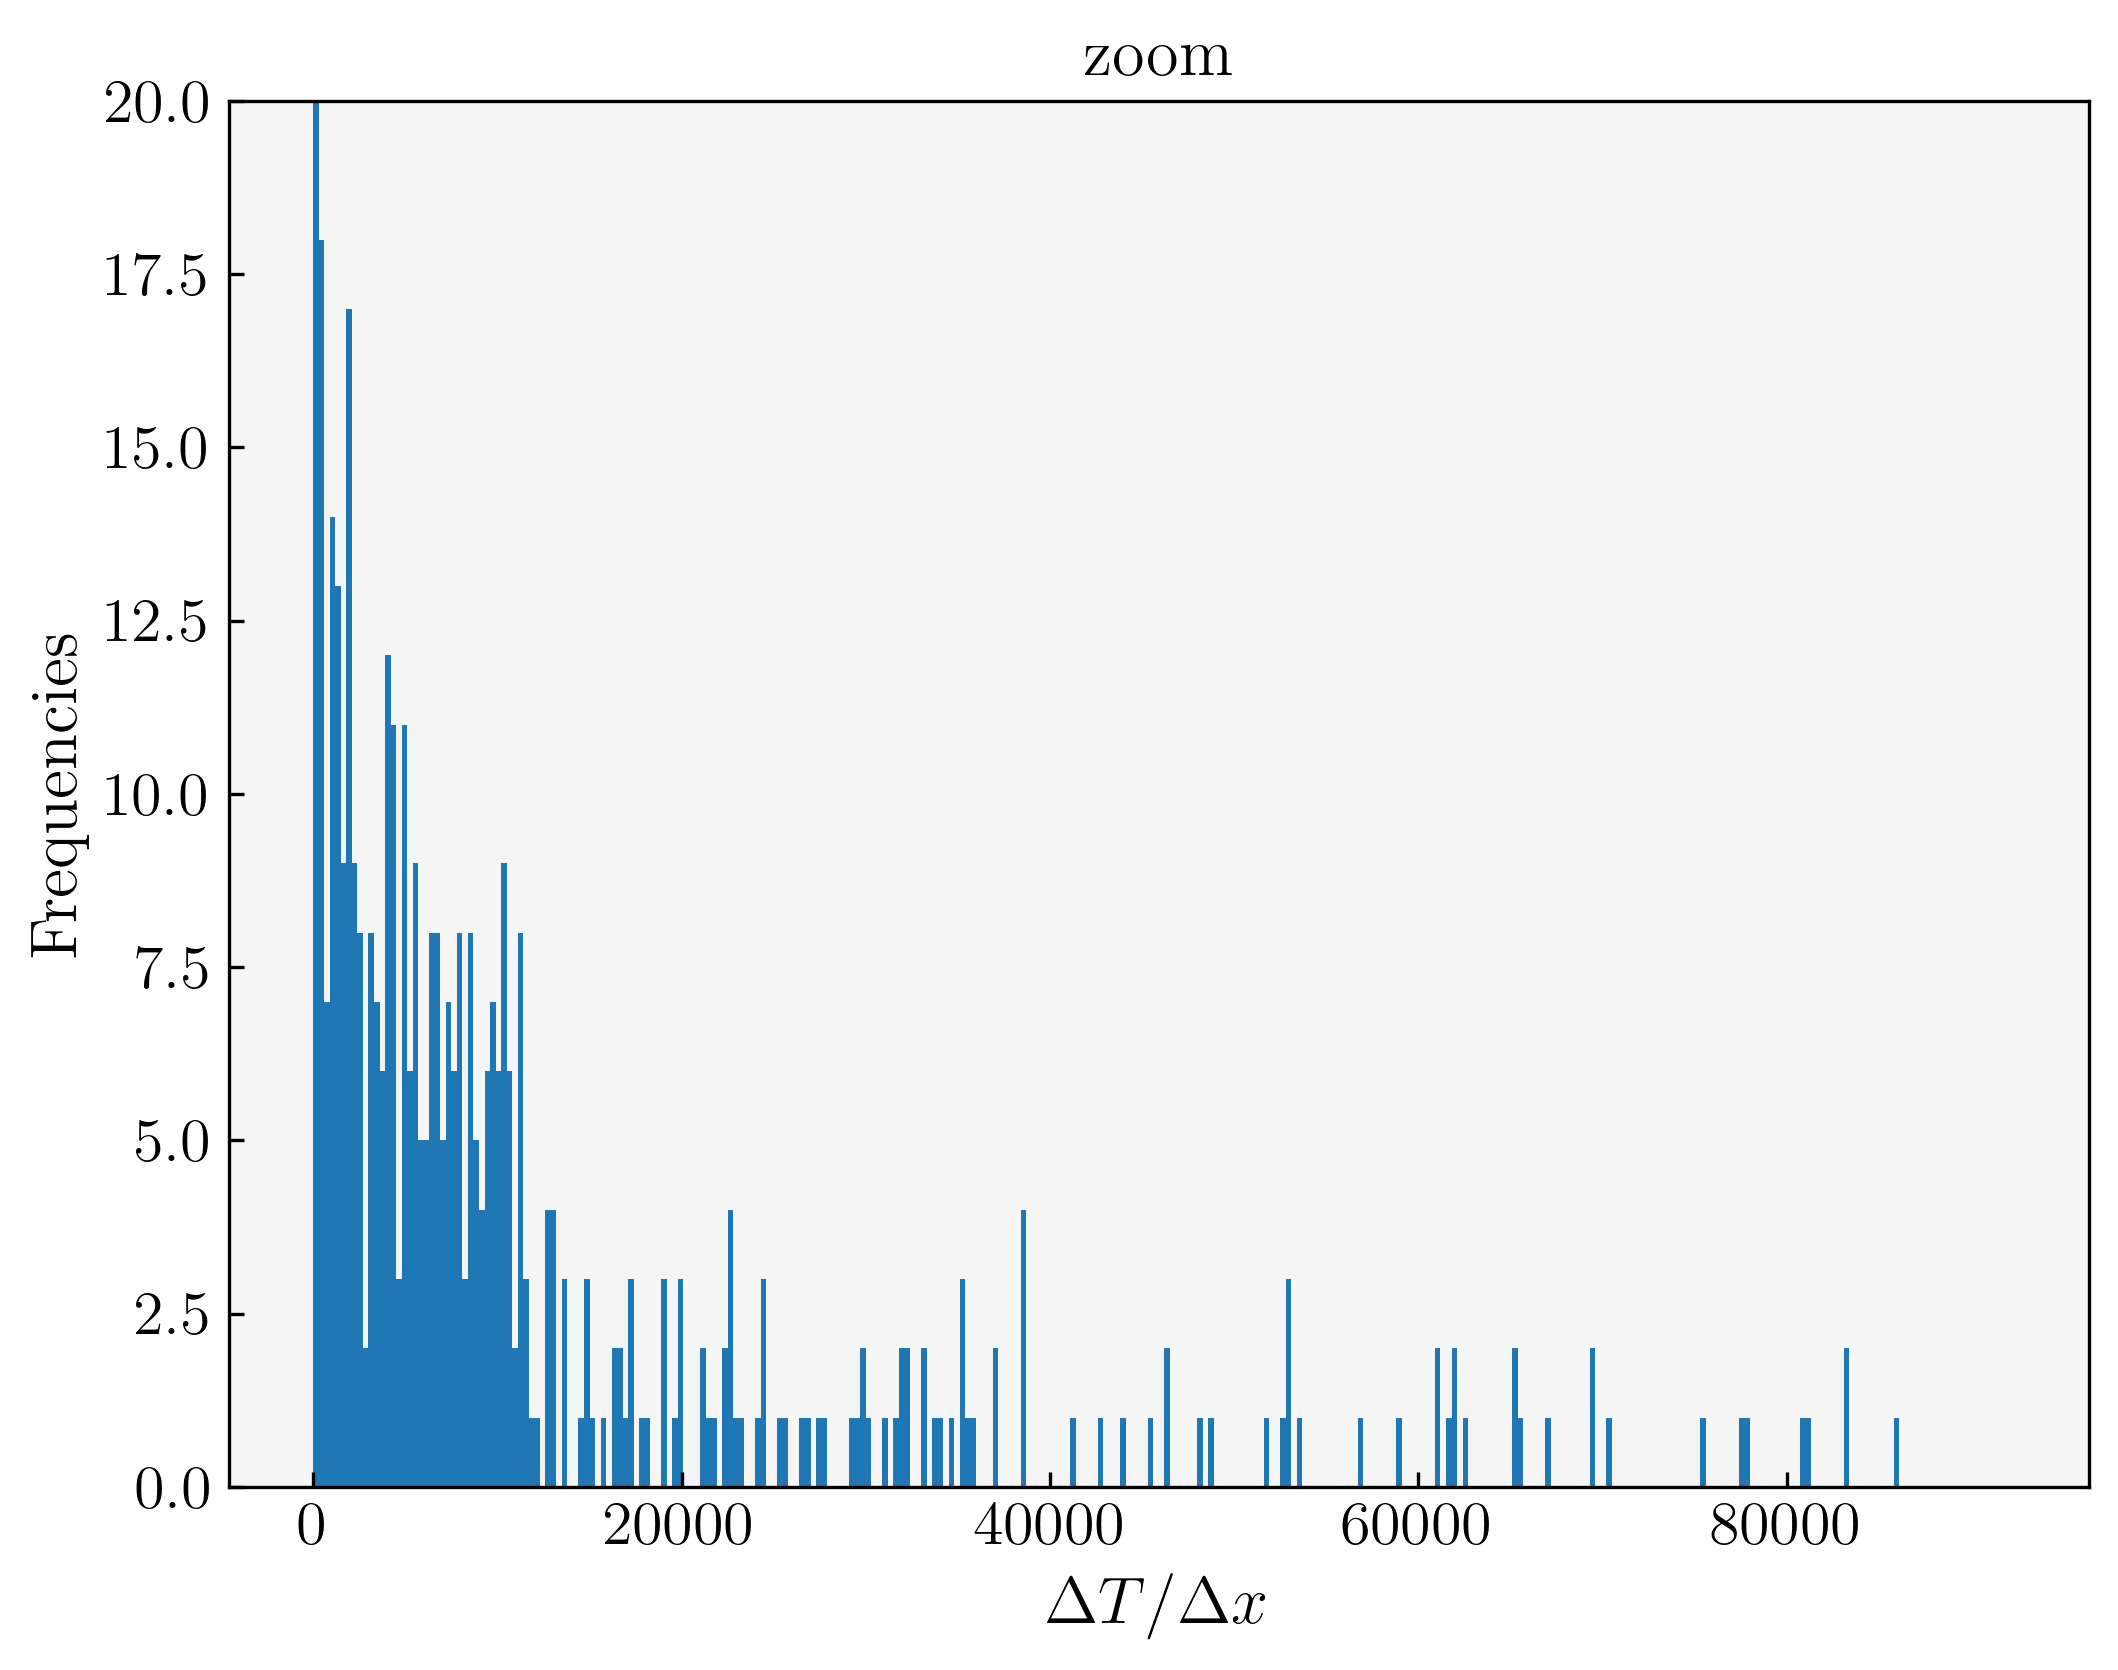

In [18]:
# Histograms to see how big is the gradient. X component
gradx_delta_hist = gradx_delta
gradx_delta_hist[gradx_delta_hist<1e-2] = 0

# Plot
bins=np.arange(0, np.max(gradx_delta_hist), 300)
plt.hist(gradx_delta_hist, bins=bins)
plt.xlabel(r'$\Delta T/\Delta x$', fontsize = 16)
plt.ylabel('Frequencies', fontsize = 16)
plt.title(r'$N_{cell}$ = ' + f'{len(gradx_delta_hist)}', fontsize = 16)

plt.figure()
binszoom=np.arange(1, np.max(gradx_delta_hist), 300)
plt.hist(gradx_delta_hist[gradx_delta_hist>1], bins=binszoom)
plt.xlabel(r'$\Delta T/\Delta x$', fontsize = 16)
plt.ylabel('Frequencies', fontsize = 16)
plt.ylim(0,20)
plt.title('zoom', fontsize = 16)


Text(0.5, 1.0, 'zoom')

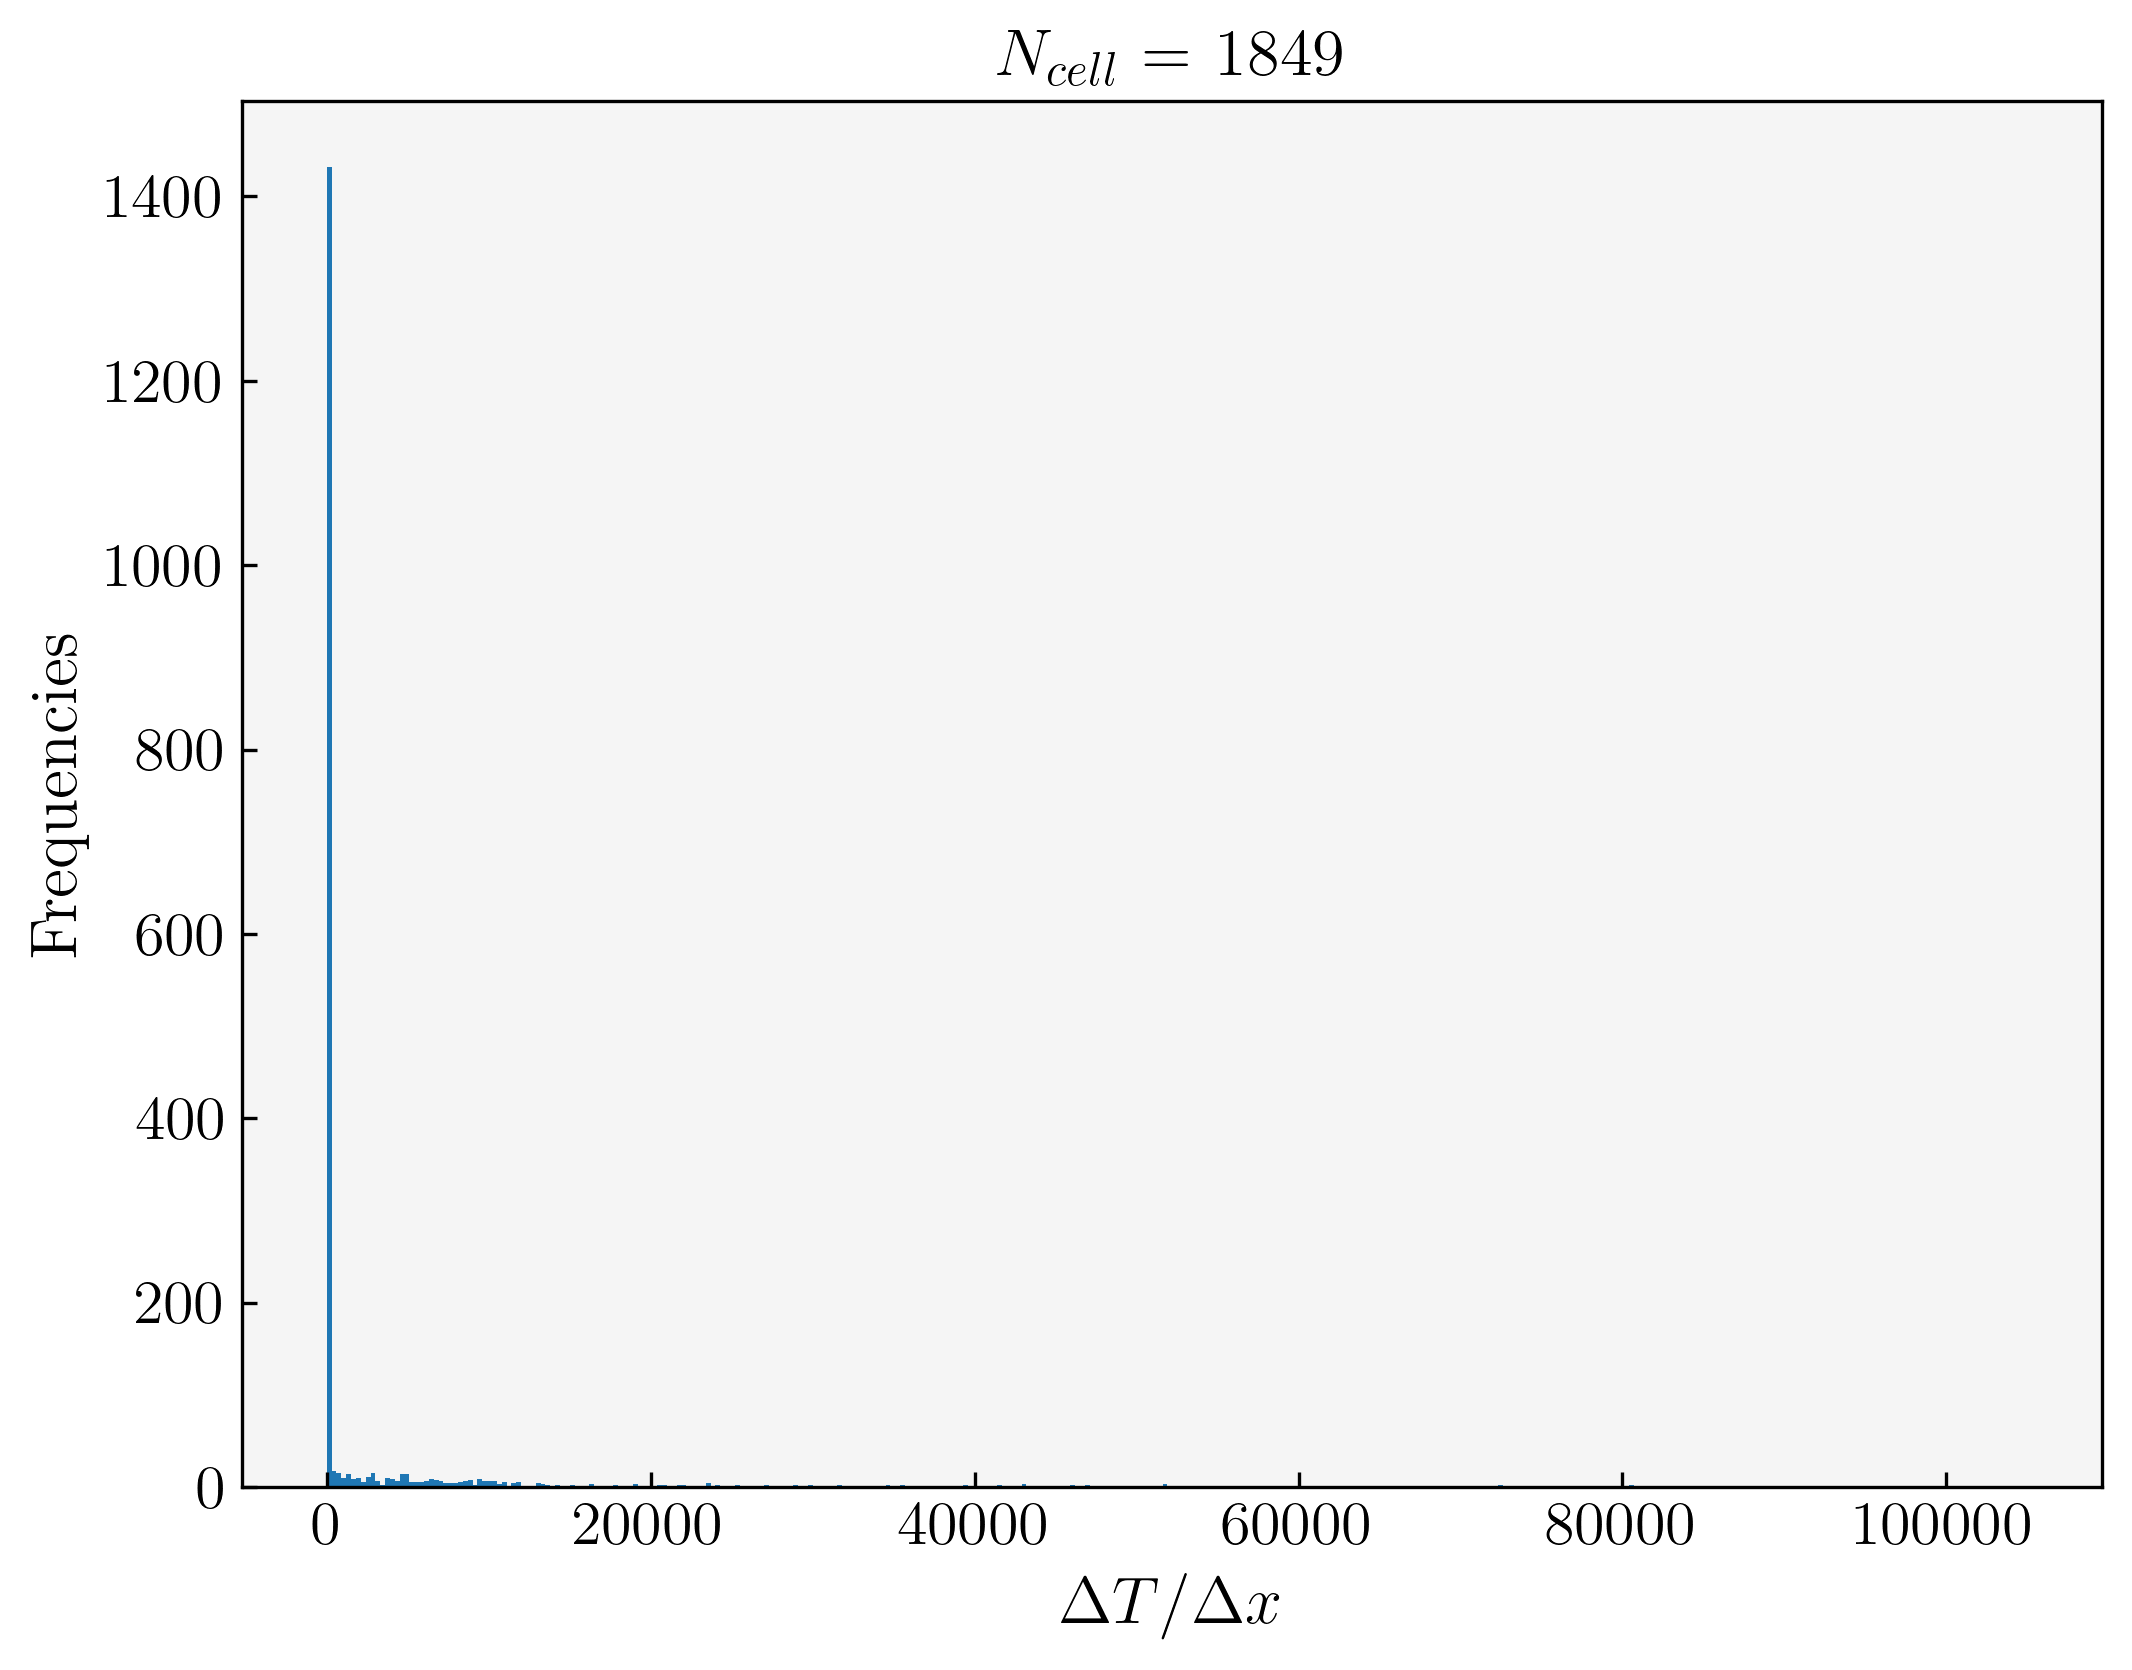

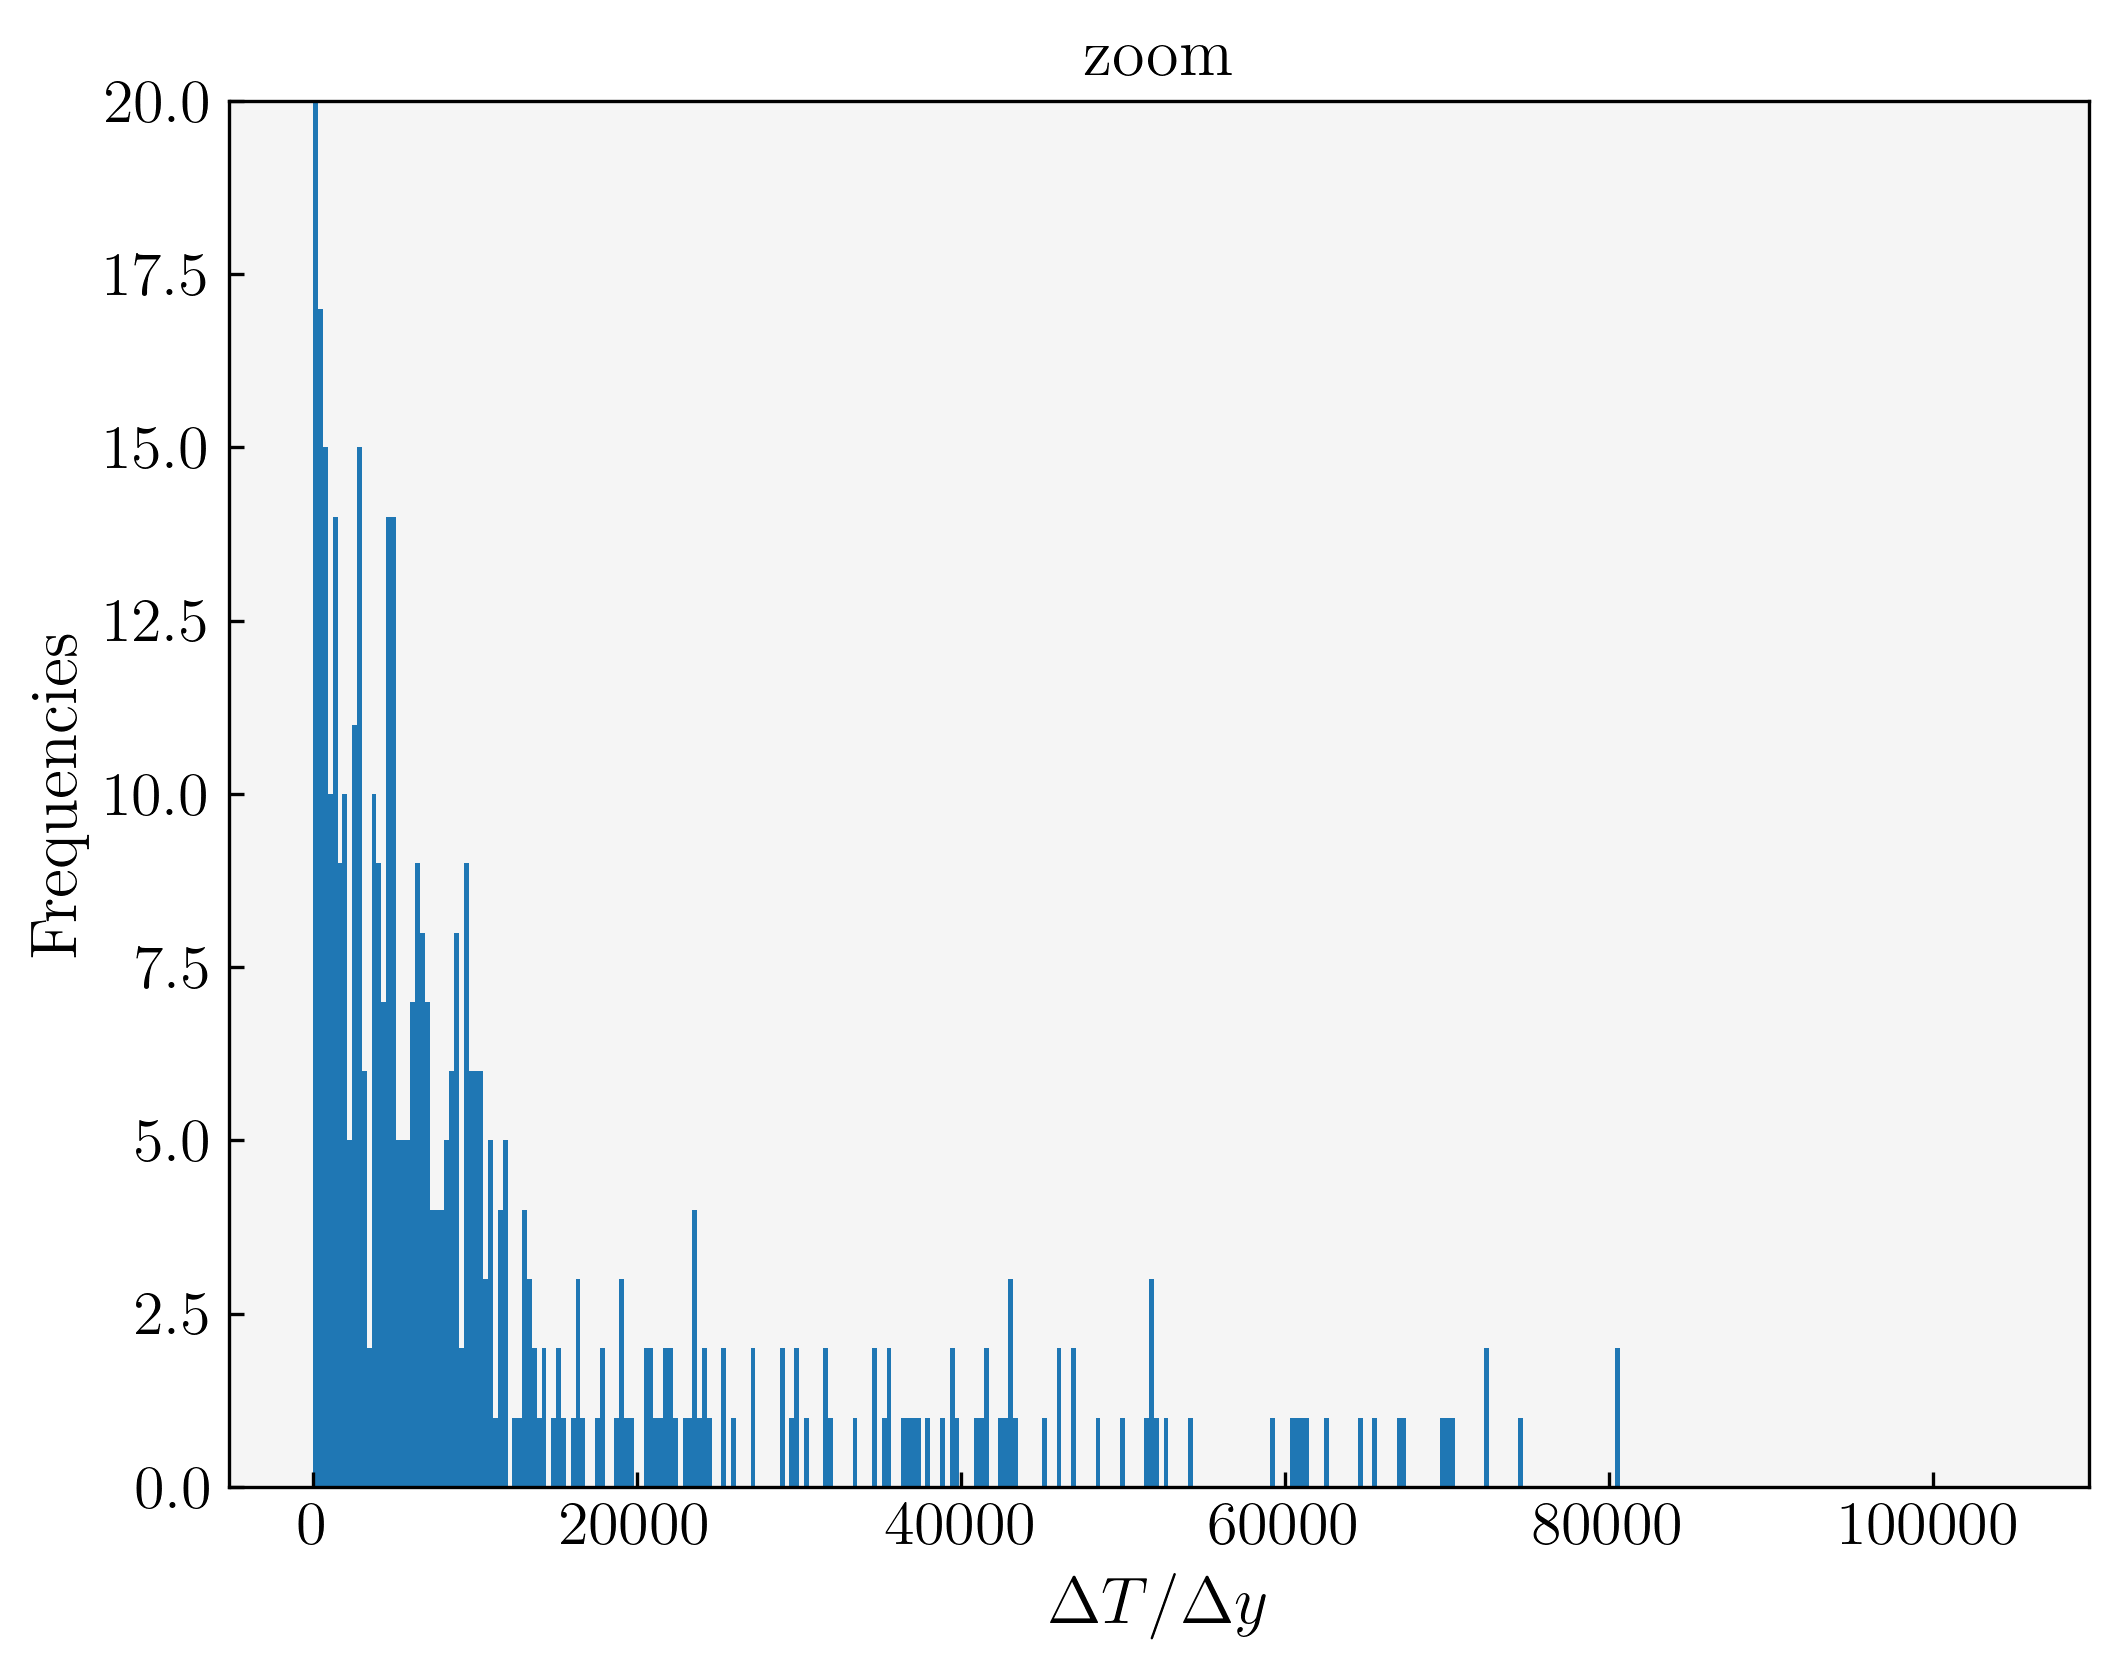

In [19]:
# Histograms to see how big is the gradient. Y component
grady_delta_hist = grady_delta
grady_delta_hist[grady_delta_hist<1e-2] = 0

# Plot
bins=np.arange(0, np.max(grady_delta_hist), 300)
plt.hist(grady_delta_hist, bins=bins)
plt.xlabel(r'$\Delta T/\Delta x$', fontsize = 16)
plt.ylabel('Frequencies', fontsize = 16)
plt.title(r'$N_{cell}$ = ' + f'{len(grady_delta_hist)}', fontsize = 16)

plt.figure()
binszoom=np.arange(1, np.max(grady_delta_hist), 300)
plt.hist(grady_delta_hist[grady_delta_hist>1], bins=binszoom)
plt.xlabel(r'$\Delta T/\Delta y$', fontsize = 16)
plt.ylabel('Frequencies', fontsize = 16)
plt.ylim(0,20)
plt.title('zoom', fontsize = 16)


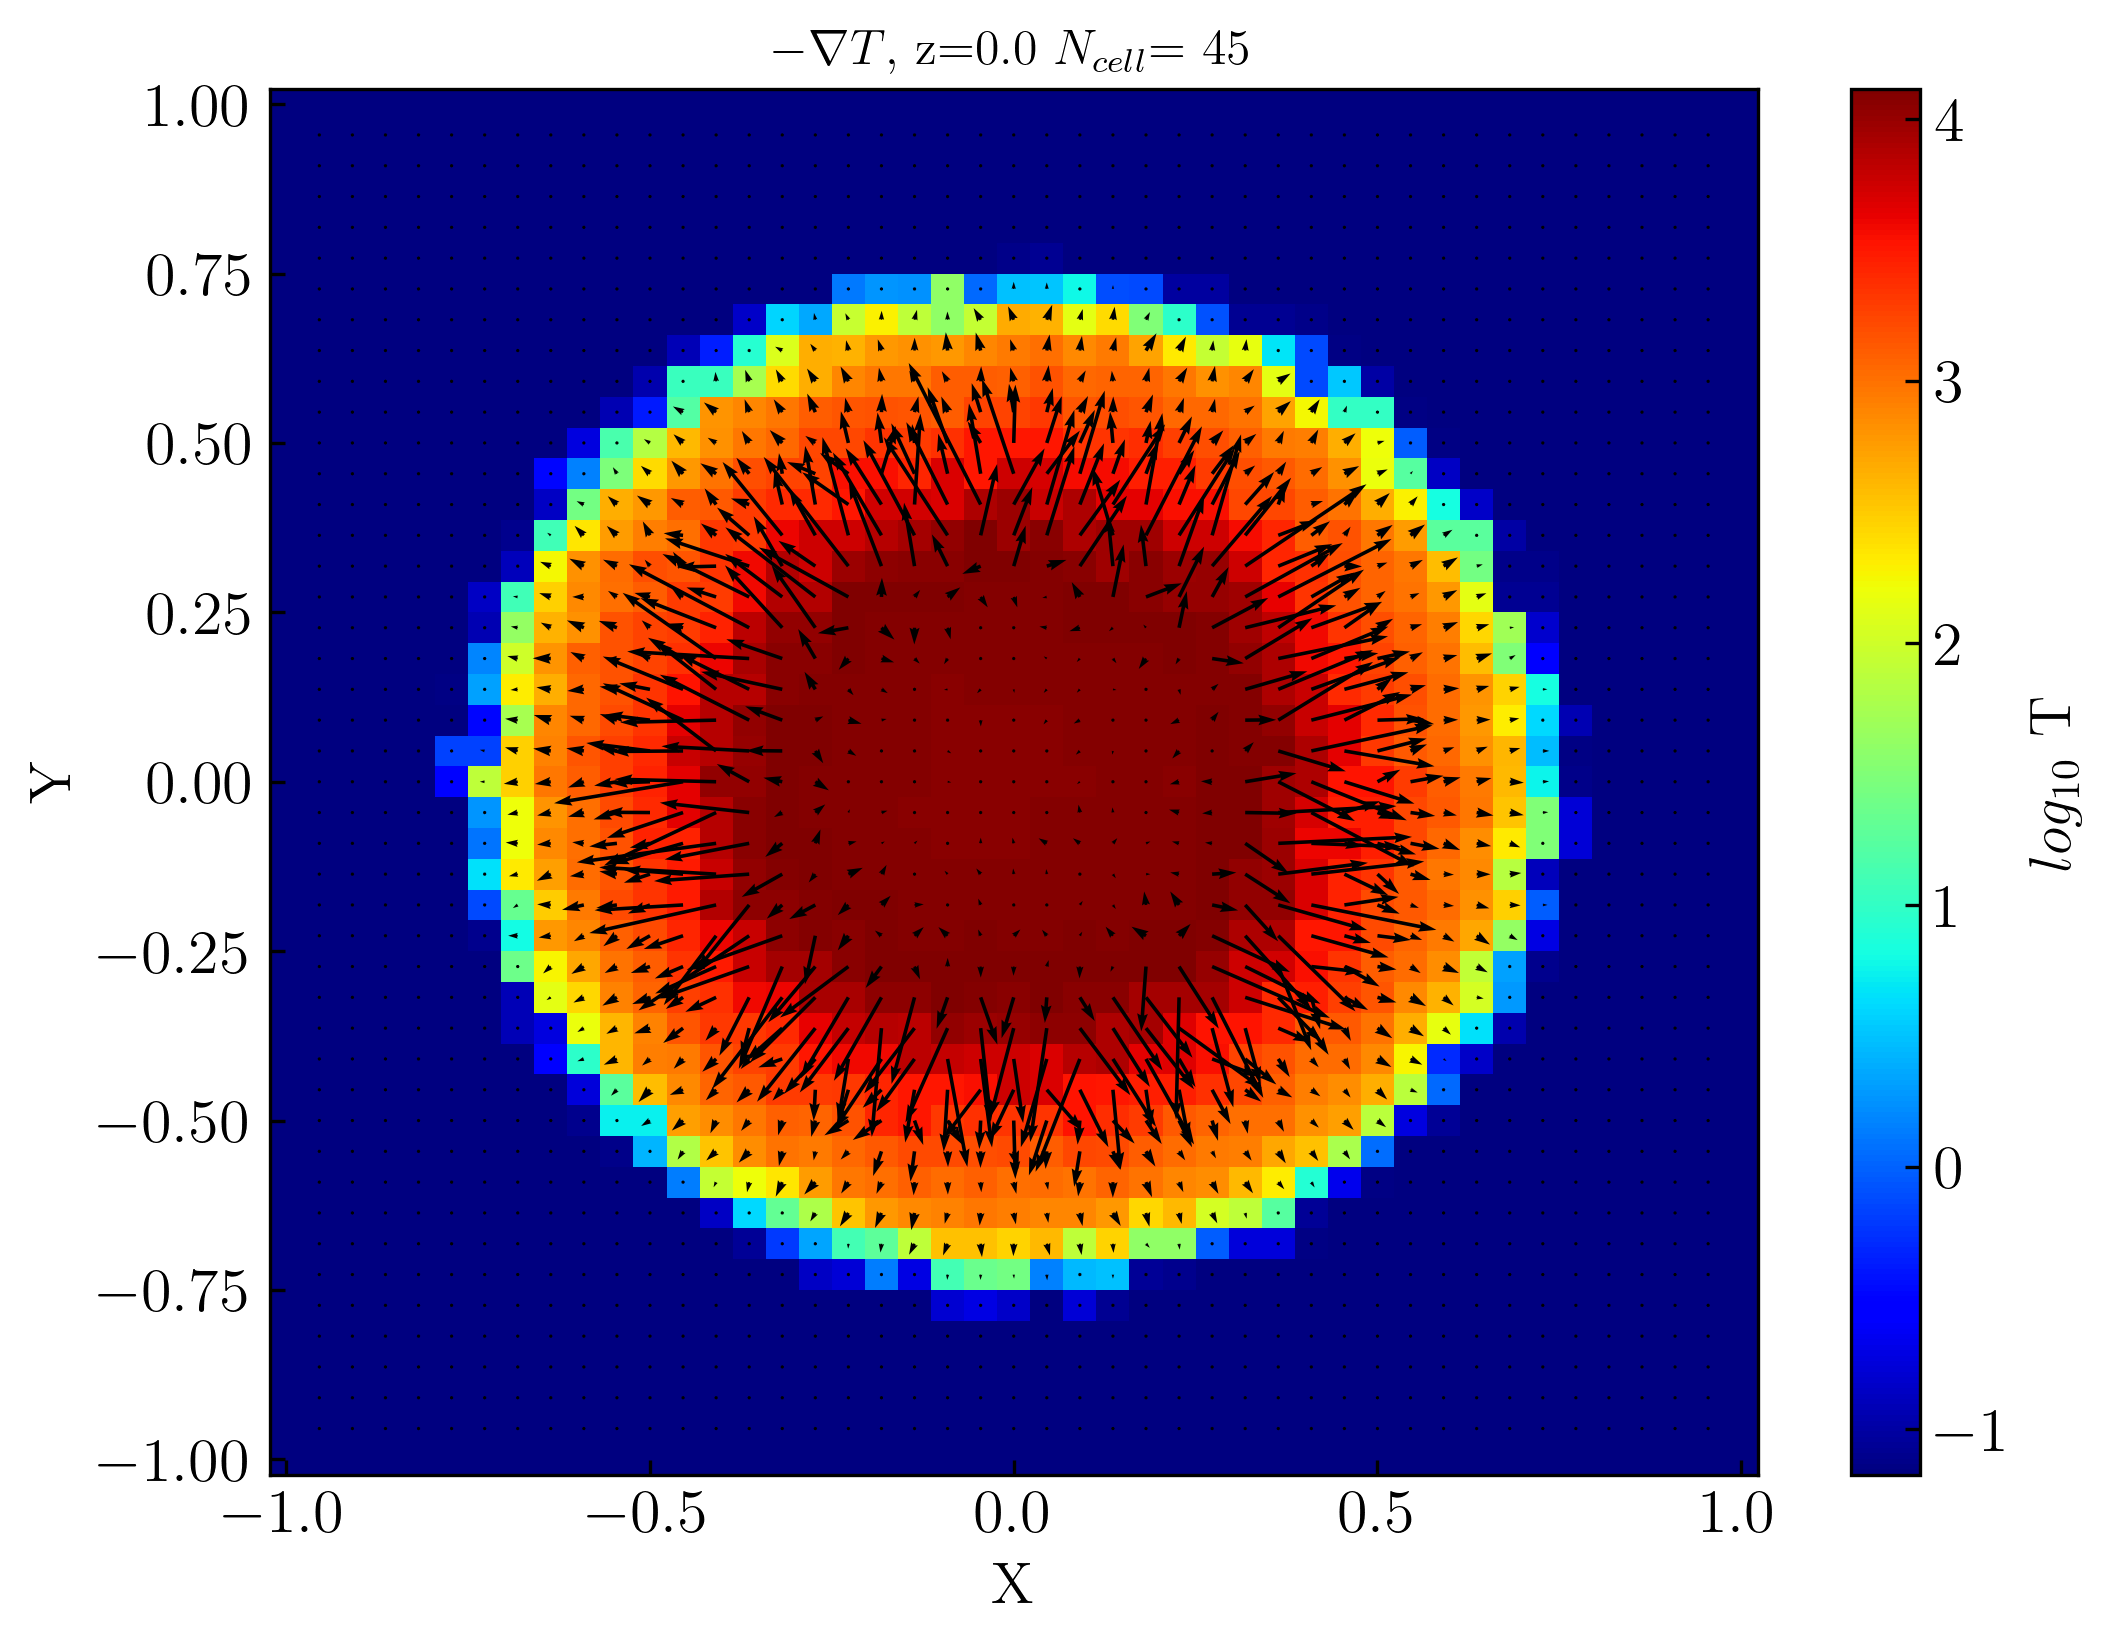

In [7]:
# Gradient T
z_chosen = np.round(z_radii[idx_slice],3)
fig, ax = plt.subplots(1,1)
ax.set_xlabel('X', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
img = ax.pcolormesh(x_radii, y_radii, T_plot.T, cmap = 'jet')
cb = plt.colorbar(img)
cb.set_label(r'$log_{10}$ T', fontsize = 14)
ax.quiver(X_cell, Y_cell, gradx_delta, grady_delta, color = 'k', angles='xy', scale_units='xy', scale=5e5)# arrow_length_ratio=0.1, color = 'k')
plt.title(r'$-\nabla T$, ' f'z={z_chosen} ' + r' $N_{cell}$'+ f'= {num}')
plt.savefig(f'Figs/Tslice_grad.png')

Now we do the same thing but with shock direction (i.e. (opposite of the) gradient of temperature normalised)

In [8]:
def shock_direction(x_array, y_array, z_array, Tgrid, idx):
    """ Find shock direction according eq.(5) by Schaal14 in the point of coordinates indices idx"""
    gradT = calc_grad(x_array, y_array, z_array, Tgrid, idx, kind_info = 'idx')
    magnitude = np.linalg.norm(gradT)
    ds = - np.divide(gradT,magnitude)
    return ds

In [9]:
# Shock direction
ds_x = []
ds_y = []
ds_z = []
X_ds = []
Y_ds= []
for i in range(1, len(x_radii)-1):
    for j in range(1,len(y_radii)-1):
        for k in range(idx_slice,idx_slice+1):
            idx = [i,j,k]
            ds =  shock_direction(x_radii, y_radii, z_radii, gridded_T, idx)
            ds_x.append(ds[0])
            ds_y.append(ds[1])
            X_ds.append(x_radii[i])
            Y_ds.append(y_radii[j])

X_ds = np.array(X_ds)
Y_ds = np.array(Y_ds)
ds_x = np.array(ds_x)
ds_y = np.array(ds_y)


In [10]:
# to exclude the arrow in the blue part, which appear due to normalisation (numerical issue)
ds_x[np.abs(gradx_delta)<10] = 0
ds_y[np.abs(gradx_delta)<10] = 0

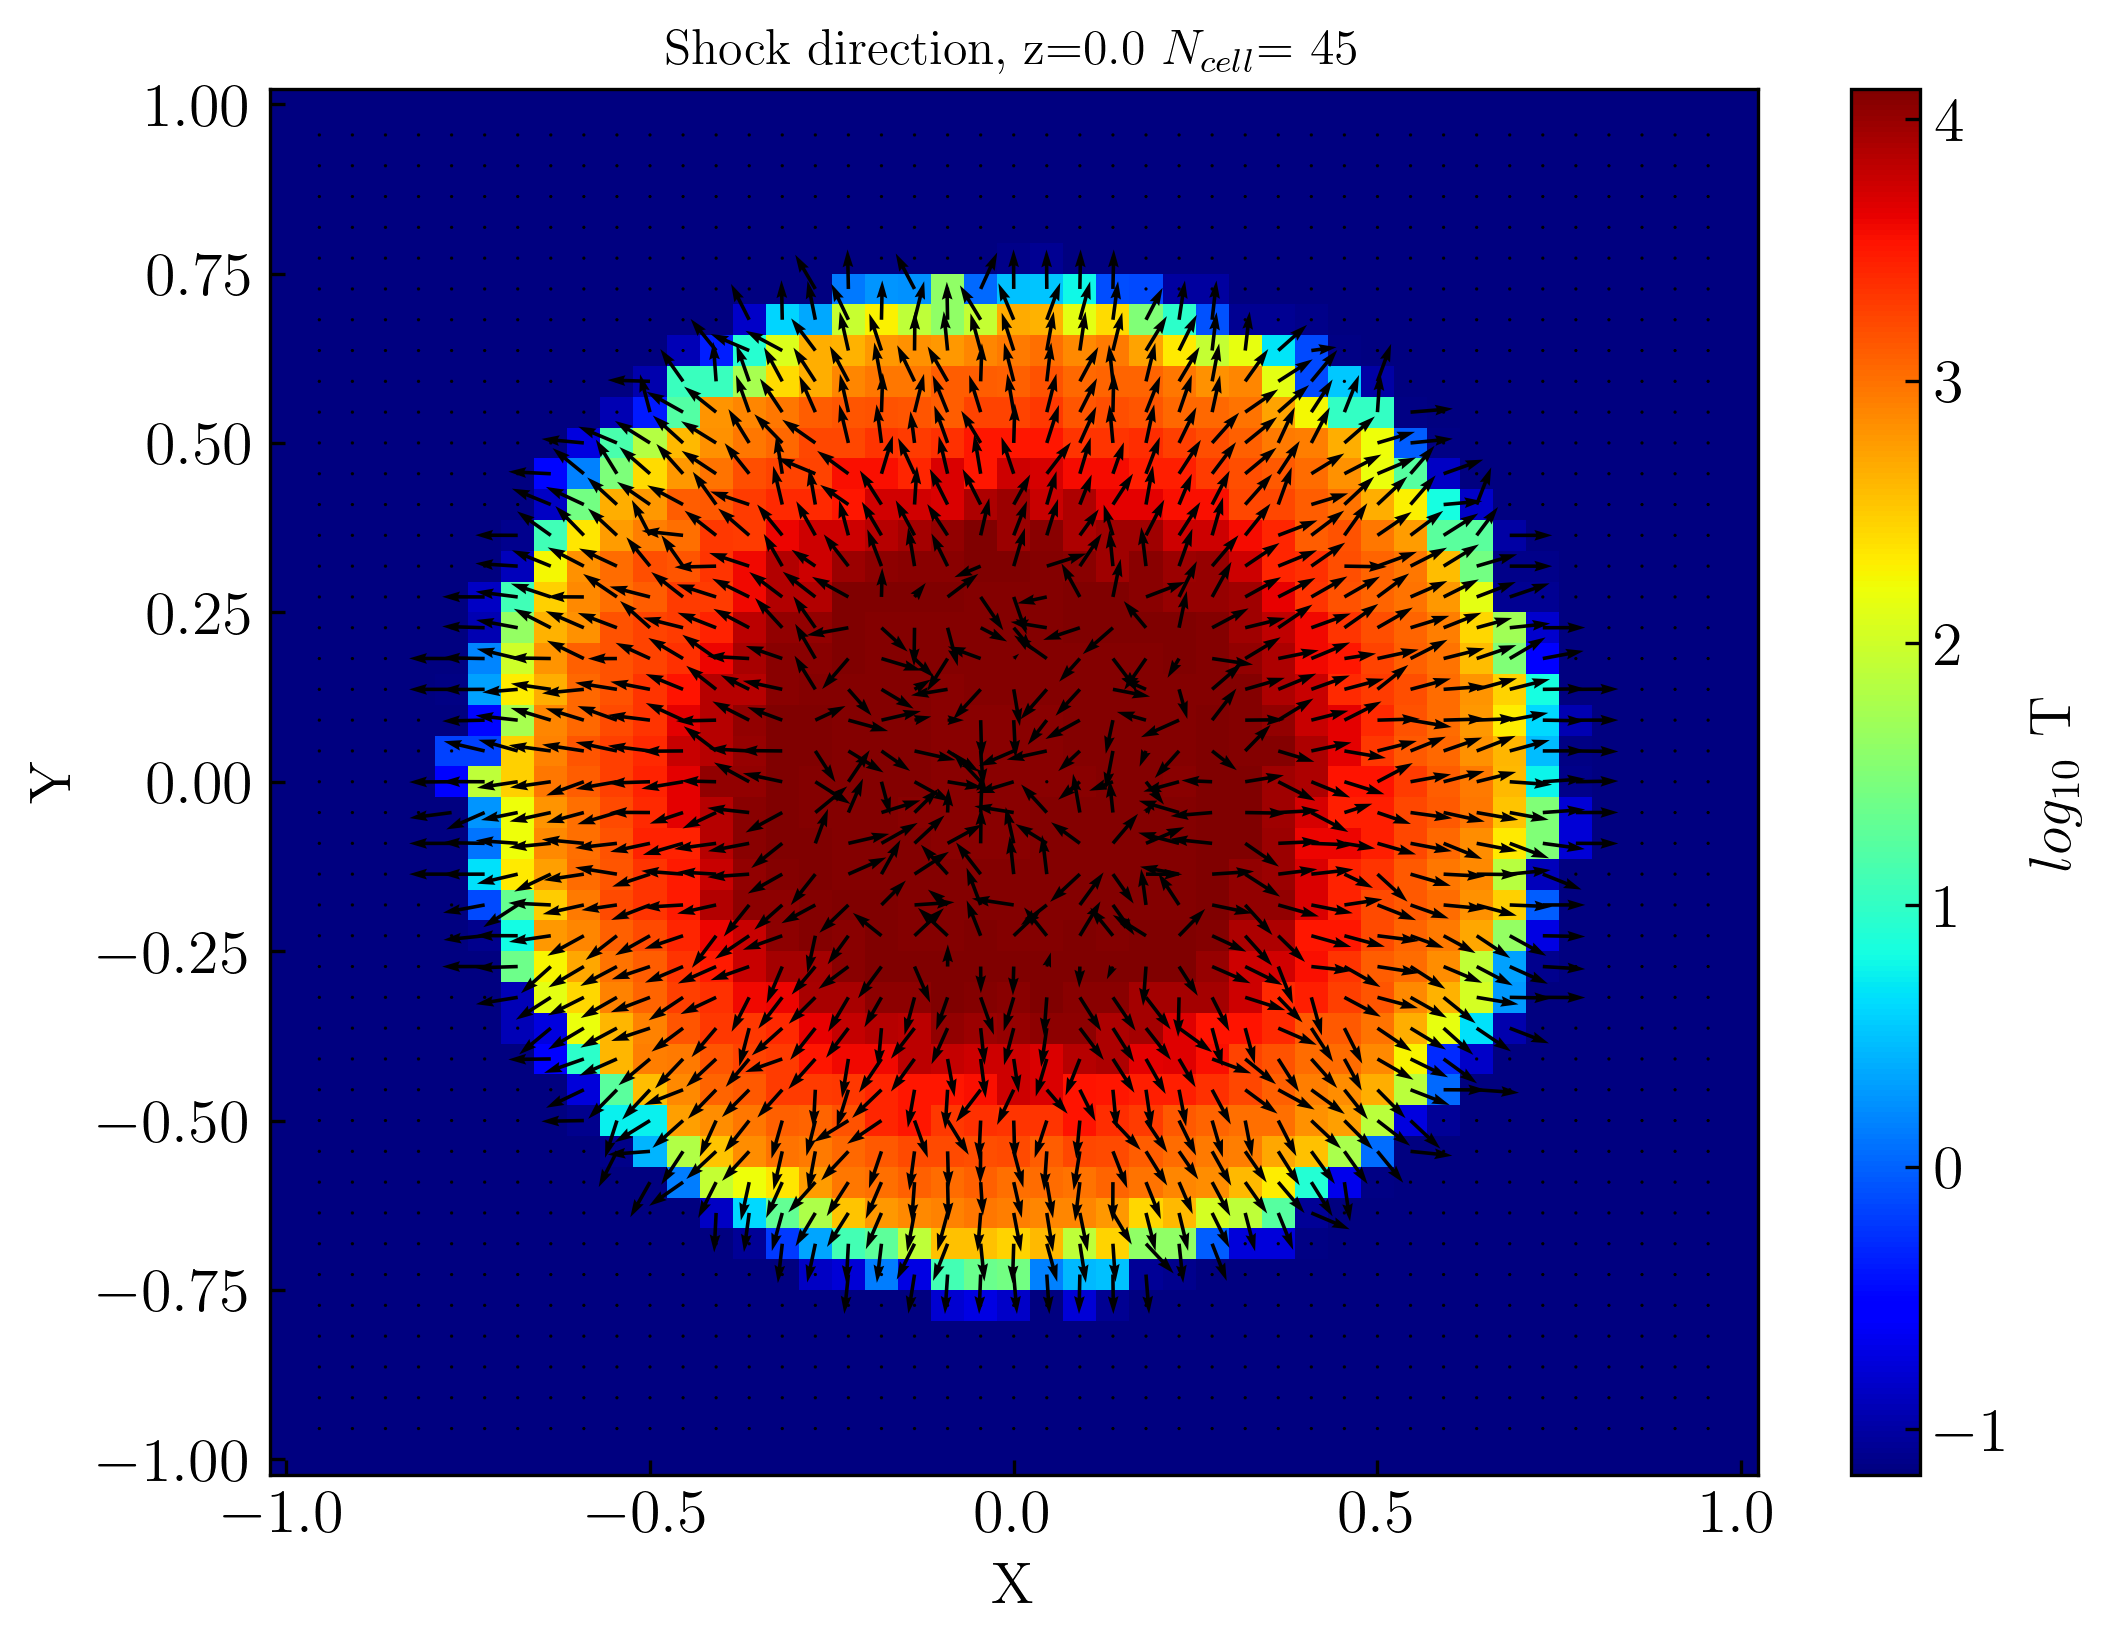

In [11]:
# Shock direction plot
fig1, ax1 = plt.subplots(1,1)
ax1.set_xlabel('X', fontsize = 14)
ax1.set_ylabel('Y', fontsize = 14)
img = ax1.pcolormesh(x_radii, y_radii, T_plot.T, cmap = 'jet')
cb = plt.colorbar(img)
#plt.xlim(-0.5,0)
cb.set_label(r'$log_{10}$ T', fontsize = 14)
ax1.quiver(X_ds, Y_ds, ds_x, ds_y, color = 'k', angles='xy', scale_units='xy')
plt.title(f'Shock direction, z={z_chosen} ' + r' $N_{cell}$'+ f'= {num}')
plt.savefig(f'Figs/shochDir_z{z_chosen}.png')